**Project Title: Image Classification using RNN**

**PROBLEM STATEMENT:**
The goal of this project is to develop a deep learning model using Recurrent Neural Networks (RNN) for image classification. The project aims to accurately classify images into different categories (e.g., cats, dogs, and pandas) based on their visual features. In addition to classification, the project also addresses the challenges of corrupted images by implementing a mechanism to detect and remove such images from the dataset. Data augmentation techniques are employed to overcome overfitting issues and improve the model's generalization ability.

Furthermore, the project involves the use of hyperparameter tuning using Keras Tuner to optimize the model's performance. The objective is to find the best combination of hyperparameters that yields the highest accuracy in image classification. By fine-tuning the model's parameters, the project aims to achieve improved accuracy and robustness in classifying images across different categories.

The initial lines of code involve setting up the directory structure for organizing the dataset. The original dataset is divided into training and testing sets for cats, dogs, and pandas. The training set consists of 85% of the images, while the remaining 15% is used for testing. The images are selectively copied from the original dataset to their respective directories for training and testing purposes.

Through this project, we aim to build an efficient image classification system utilizing RNNs, which can accurately classify images and provide valuable insights for various applications, such as object recognition, content filtering, and visual data analysis.

In [ ]:
import os, shutil

## Making Own Directory in the System 

In [ ]:
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = 'Dataset'

# The directory where we will store our smaller dataset
base_dir = 'final_data_folders1'
os.mkdir(base_dir)

# Directories for our training and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our training panda pictures
train_panda_dir = os.path.join(train_dir, 'panda')
os.mkdir(train_panda_dir)

# Directory with our testing cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our testing dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Directory with our testing panda pictures
test_panda_dir = os.path.join(test_dir, 'panda')
os.mkdir(test_panda_dir)

#Dividing the data into 85%,15% for training and testing purposes 
# let us take first 850 cat images to train_cats_dir
fnames = ['cats_{:05d}.jpg'.format(i) for i in range(1,851)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 150 cat images to test_cats_dir
fnames = ['cats_{:05d}.jpg'.format(i) for i in range(851, 1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 850 dog images to train_dogs_dir
fnames = ['dogs_{:05d}.jpg'.format(i) for i in range(1,851)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 150 dog images to test_dogs_dir
fnames = ['dogs_{:05d}.jpg'.format(i) for i in range(851, 1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 850 panda images to train_panda_dir
fnames = ['panda_{:05d}.jpg'.format(i) for i in range(1,851)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_panda_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 150 panda images to test_panda_dir
fnames = ['panda_{:05d}.jpg'.format(i) for i in range(851, 1001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_panda_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
#Let us check number of images into the each folder by printing its count

#train for training the model efficiently
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total training panda images:', len(os.listdir(train_panda_dir)))

#Test for checking the model evaluation purposes
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))
print('total test panda images:', len(os.listdir(test_panda_dir)))


total training cat images: 850
total training dog images: 850
total training panda images: 850
total test cat images: 150
total test dog images: 150
total test panda images: 150


## Deleting the Corrupted Images

Here corrupted images mean images having insufficient data to process i.e., we would not be able to open that file from the directory, So let us check if we have any and delete them such that our model can train better and efficient

JFIF stands for JPEG File Interchange Format and is a standard for storing JPEG images in a file. In the above code, we checked for a simple way of determining whether a file is a JFIF-formatted JPEG image, but it is not foolproof. Other formats, such as Exif, can also contain JPEG images, and these formats may not contain the string "JFIF"

In [ ]:
import tensorflow as tf
num_skipped = 0
for folder_name in ("train", "test"):
    for subfolder_name in ("cats", "dogs", "panda"):
        folder_path = os.path.join(base_dir, folder_name, subfolder_name)
        for fname in os.listdir(folder_path):
            fpath = os.path.join(folder_path, fname)
            try:
                fobj = open(fpath, "rb")
                is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
            finally:
                fobj.close()
            if not is_jfif:
                num_skipped += 1
                # Delete corrupted image
                os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


## Loading Our dataset from the Directory : Training Data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images in the dataset will be rescaled by 1./255 such that we have the range of values from 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255, # rescaling the pixels
                                   validation_split=0.25
                                  #Split the dataset for training and validation
                                  )
                                   
train_generator = train_datagen.flow_from_directory(train_dir, # This is the target directory
                                                    target_size = (256, 256),# All images will be resized to 256x256
                                                    # Here 256x256 because it is the highest possible resolution of an image
                                                    # Helps the model to understand the picture better
                                                    batch_size = 20,
                                                    shuffle = True, 
                                                    # Since we use categorical_crossentropy loss, we need categorical labels
                                                    class_mode = 'categorical', subset = 'training')

validation_generator = train_datagen.flow_from_directory(train_dir, # This is the target directory
                                                    target_size = (256, 256),# All images will be resized to 256x256
                                                    # Here 256x256 because it is the highest possible resolution of an image
                                                    # Helps the model to understand the picture better
                                                    batch_size = 20,
                                                    shuffle = True, 
                                                    # Since we use categorical_crossentropy loss, we need categorical labels
                                                    class_mode = 'categorical', subset = 'validation')

# We should get 1914 images for 638 x 3 for 3 classes for training the model
# We should get 636 images for 212 x 3 for 3 classes for validating the model

Found 1914 images belonging to 3 classes.
Found 636 images belonging to 3 classes.


In [ ]:
# The generator yields these batches indefinitely, For this reason, we need to break the iteration loop at some point
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
# The above code prints the shape of each class of data and labels

data batch shape: (20, 256, 256, 3)
labels batch shape: (20, 3)


## Visualize the Data

C:\Users\shiva\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


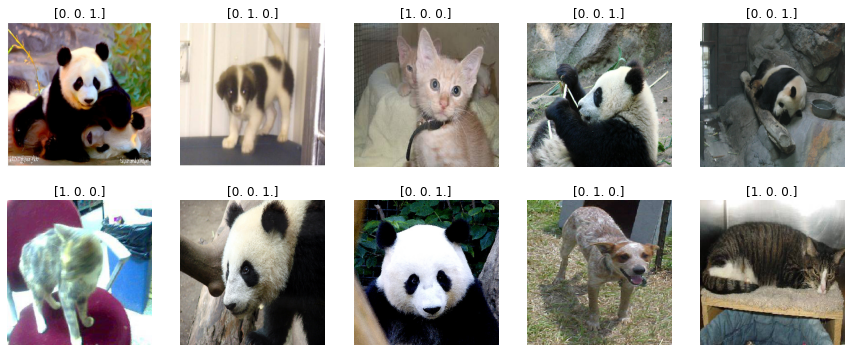

In [ ]:
# Let us visualize the data present in the training dataset

import random
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the generator
images, labels = next(train_generator)

# Shuffle the images and labels together
shuffled_indices = random.sample(range(len(images)), 10)
images = images[shuffled_indices]
labels = labels[shuffled_indices]

# Reverse normalization as we have scaled it down during analysis
images = images * 255

# Plot the images using Matplotlib
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

for i, image in enumerate(images):
    axs[i].imshow(np.uint8(image))
    axs[i].axis("off")
    axs[i].set_title(labels[i])

plt.show()


## Building a Model (Sequential)

In [ ]:
#From the above counts we can say that our data is balanced and does not have bias towards any of the class
#850 images of each class in the training dataset
#So,this becomes a balanced mutli-class classification problem, which means that classification accuracy will be highest
#Now, Let's train our model on the training and validation data
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import models

keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

#We have chosen larger neural network i.e. 3 because in the data we have large number of images
#Which serves to augment the capacity of the network, and to further reduce the size of the feature maps

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
model.summary()
#Here we can observe our feature maps are reducing from 254X254 to 14X14

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

## Fitting our Model with the Dataset

In [ ]:
# Now, let's fit our model

history = model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=15,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),verbose = 1)

Epoch 1/15
96/96 [==============================] - 96s 982ms/step - loss: 0.9576 - accuracy: 0.4963 - val_loss: 0.8639 - val_accuracy: 0.5393
Epoch 2/15
96/96 [==============================] - 92s 956ms/step - loss: 0.7178 - accuracy: 0.6343 - val_loss: 0.7570 - val_accuracy: 0.5943
Epoch 3/15
96/96 [==============================] - 93s 971ms/step - loss: 0.6281 - accuracy: 0.7032 - val_loss: 0.7606 - val_accuracy: 0.6305
Epoch 4/15
96/96 [==============================] - 89s 932ms/step - loss: 0.5336 - accuracy: 0.7471 - val_loss: 0.7165 - val_accuracy: 0.6808
Epoch 5/15
96/96 [==============================] - 91s 949ms/step - loss: 0.4671 - accuracy: 0.7863 - val_loss: 0.8530 - val_accuracy: 0.6572
Epoch 6/15
96/96 [==============================] - 96s 998ms/step - loss: 0.3458 - accuracy: 0.8532 - val_loss: 0.7988 - val_accuracy: 0.6808
Epoch 7/15
96/96 [==============================] - 91s 952ms/step - loss: 0.3066 - accuracy: 0.8736 - val_loss: 0.8182 - val_accuracy: 0.6619

## Plotting Graphs between Training and Validation in Accuracy and Losses

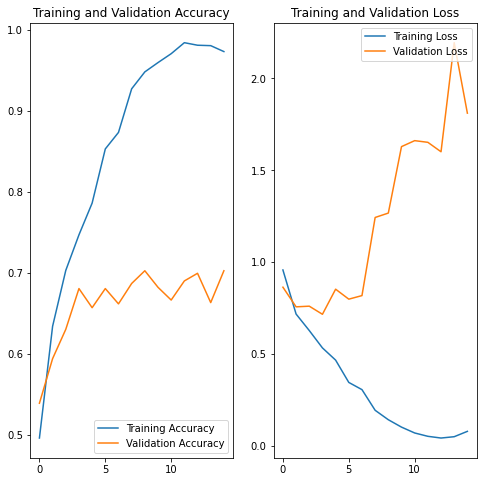

Training Accuracy:
0.9733542203903198
Testing Accuracy:
0.7028301954269409


(None, None)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#This code is used to plot the training and validation accuracy
epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
 
# returns accuracy of training
print("Training Accuracy:"), print(history.history['accuracy'][-1])
print("Testing Accuracy:"), print (history.history['val_accuracy'][-1])

From the above graph we can see that our model is learning too much details on the training dataset and not performing well on the validation data, this problem is called over-fitting. To overcome this problem, There are several techniques such as data augmentation and dropout; Let us try them and check how our model performs. Here, Data augmentation mean we feed the same image in different formats i.e., the number of training images does not change, but the number of variations of the training images increases. For example we can observe it from the below visualization, we perform only for the training dataset whereas it is not performed on validation dataset and we do not need it on it.

## Data Augmentation to Overcome Over-fitting

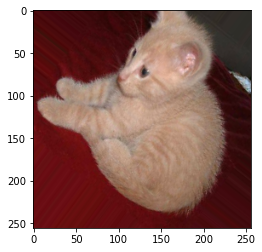

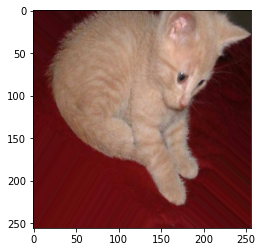

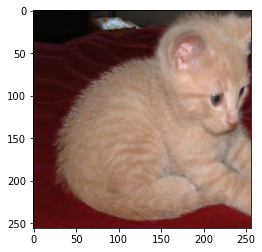

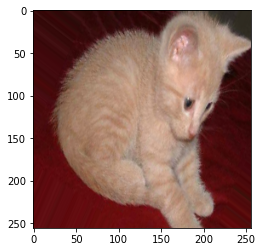

In [ ]:
# To overcome overfitting problem , We can use techniques such as dropout and data augmentation

datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
# This is module with image preprocessing utilities

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = tf.keras.utils.load_img(img_path, target_size=(256, 256))

# Convert it to a Numpy array with shape (256, 256, 3)
x = tf.keras.utils.img_to_array(img)

# Reshape it to (1, 256, 256, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.utils.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

## Building a Model 

In [ ]:
keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
                                   validation_split=0.25
                                  )
# Here, the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.25)

train_generator = train_datagen.flow_from_directory(train_dir, # This is the target directory
                                                    target_size = (256, 256),# All images will be resized to 256x256
                                                    # Here 256x256 because it is the highest possible resolution of an image
                                                    # Helps the model to understand the picture better
                                                    batch_size = 20,
                                                    shuffle = True, 
                                                    # Since we use categorical_crossentropy loss, we need categorical labels
                                                    class_mode = 'categorical', subset = 'training')

validation_generator = validation_datagen.flow_from_directory(train_dir, # This is the target directory
                                                    target_size = (256, 256),# All images will be resized to 256x256
                                                    # Here 256x256 because it is the highest possible resolution of an image
                                                    # Helps the model to understand the picture better
                                                    batch_size = 20,
                                                    shuffle = True, 
                                                    # Since we use categorical_crossentropy loss, we need categorical labels
                                                    class_mode = 'categorical', subset = 'validation')

# We should get 1914 images for 638 x 3 for 3 classes for training the model
# We should get 636 images for 212 x 3 for 3 classes for validating the model

Found 1914 images belonging to 3 classes.
Found 636 images belonging to 3 classes.


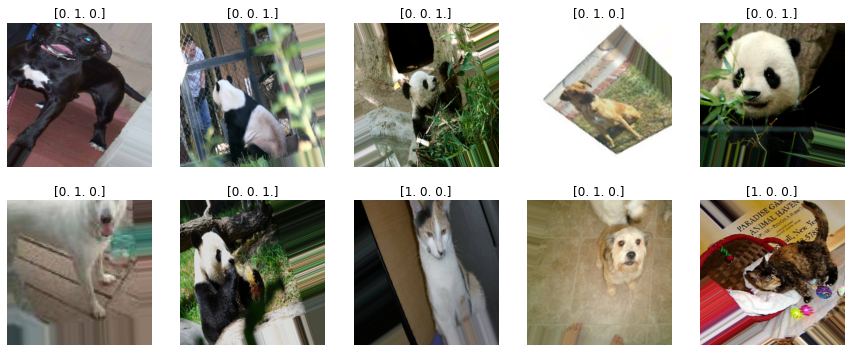

In [ ]:
# Let us visualize the data present in the training dataset

import random
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the generator
images, labels = next(train_generator)

# Shuffle the images and labels together
shuffled_indices = random.sample(range(len(images)), 10)
images = images[shuffled_indices]
labels = labels[shuffled_indices]

# Reverse normalization as we have scaled it down during analysis
images = images * 255

# Plot the images using Matplotlib
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

for i, image in enumerate(images):
    axs[i].imshow(np.uint8(image))
    axs[i].axis("off")
    axs[i].set_title(labels[i])

plt.show()

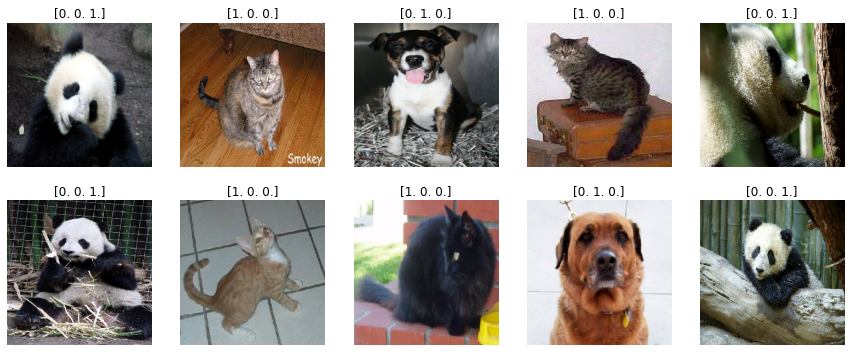

In [ ]:
# Let us visualize the data present in the training dataset

import random
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the generator
images, labels = next(validation_generator)

# Shuffle the images and labels together
shuffled_indices = random.sample(range(len(images)), 10)
images = images[shuffled_indices]
labels = labels[shuffled_indices]

# Reverse normalization as we have scaled it down during analysis
images = images * 255

# Plot the images using Matplotlib
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

for i, image in enumerate(images):
    axs[i].imshow(np.uint8(image))
    axs[i].axis("off")
    axs[i].set_title(labels[i])

plt.show()

In [ ]:
history = model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=15,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),verbose = 1)

Epoch 1/15
96/96 [==============================] - 103s 1s/step - loss: 0.9317 - accuracy: 0.5125 - val_loss: 0.8098 - val_accuracy: 0.5629
Epoch 2/15
96/96 [==============================] - 105s 1s/step - loss: 0.7908 - accuracy: 0.5967 - val_loss: 0.8428 - val_accuracy: 0.6022
Epoch 3/15
96/96 [==============================] - 104s 1s/step - loss: 0.7882 - accuracy: 0.6024 - val_loss: 0.7024 - val_accuracy: 0.6336
Epoch 4/15
96/96 [==============================] - 102s 1s/step - loss: 0.7336 - accuracy: 0.6301 - val_loss: 0.6795 - val_accuracy: 0.6871
Epoch 5/15
96/96 [==============================] - 101s 1s/step - loss: 0.7082 - accuracy: 0.6379 - val_loss: 0.6786 - val_accuracy: 0.6777
Epoch 6/15
96/96 [==============================] - 102s 1s/step - loss: 0.7171 - accuracy: 0.6452 - val_loss: 0.6806 - val_accuracy: 0.6840
Epoch 7/15
96/96 [==============================] - 101s 1s/step - loss: 0.6903 - accuracy: 0.6489 - val_loss: 0.8965 - val_accuracy: 0.6305
Epoch 8/15
96

## Plotting Graphs between Training and Validation in Accuracy and Losses

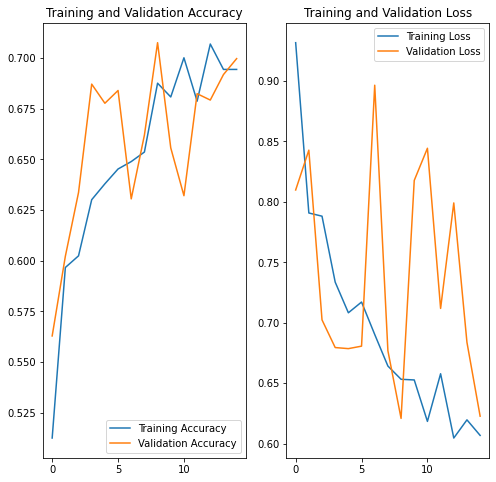

Training Accuracy:
0.6943573951721191
Testing Accuracy:
0.6996855139732361


(None, None)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#This code is used to plot the training and validation accuracy
epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
 
# returns accuracy of training
print("Training Accuracy:"), print(history.history['accuracy'][-1])
print("Testing Accuracy:"), print (history.history['val_accuracy'][-1])

In [ ]:
model.save('catsanddogsandpanda_final.h5')

Now, Our model performs better with both the training and validation dataset but the problem here is our reduction in validation losses is not constant or linear it depicts us that the learning rate of the optimizer is higher than usual. So, let us tune our model with various values in keras tuner and find the best model possible for us! 

## Hyper Parameter Tuning using Keras Tuner

In [ ]:
#let's perform hyper parameter tuning using keras tuner
import keras_tuner as kt
# Here were are building a model based on our hyper parameter
def model_builder(hp):
    keras.backend.clear_session()
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3, 3), activation='relu',input_shape=(256, 256, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))

    # Now, Let's tune the learning rate for the optimizer
    # Choose an optimal value from the  0.005, 0.001, 0.0005, or 0.0001 values
    hp_lr = hp.Choice('learning_rate', values=[5e-3,1e-3,5e-4,1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_lr), 
                  loss = keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

    return model

In [ ]:
tuner = kt.Hyperband(model_builder,objective='val_accuracy',max_epochs=20, 
                     directory='mydirectory', project_name='intro_to_kt1')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(train_generator, epochs = 15, 
             validation_data=validation_generator, callbacks=[stop_early])
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 31m 21s]
val_accuracy: 0.7342767119407654

Best val_accuracy So Far: 0.7720125913619995
Total elapsed time: 06h 17m 50s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#looking into the best hyper parameter values possible for our model
best_hps.values

{'learning_rate': 0.001,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

Here, We have seen as the system has lower capacity to execute the tuner has taken a elapsed time of 6 hours to perform 30 trails by varying 4 learning rates. Due to this limitations, we have limited our tuning to only parameter and number of epochs by very less margin. From this model we tuned our best parameter and so, let us train our new model with these values.

## Final Model (Best Model Possible) 

In [ ]:
keras.backend.clear_session()
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
                                   shear_range=0.2,zoom_range=0.2,horizontal_flip=True,
                                   validation_split=0.25
                                  )
# Here, the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.25)

train_generator = train_datagen.flow_from_directory(train_dir, # This is the target directory
                                                    target_size = (256, 256),# All images will be resized to 256x256
                                                    # Here 256x256 because it is the highest possible resolution of an image
                                                    # Helps the model to understand the picture better
                                                    batch_size = 20,
                                                    shuffle = True, 
                                                    # Since we use categorical_crossentropy loss, we need categorical labels
                                                    class_mode = 'categorical', subset = 'training')

validation_generator = validation_datagen.flow_from_directory(train_dir, # This is the target directory
                                                    target_size = (256, 256),# All images will be resized to 256x256
                                                    # Here 256x256 because it is the highest possible resolution of an image
                                                    # Helps the model to understand the picture better
                                                    batch_size = 20,
                                                    shuffle = True, 
                                                    # Since we use categorical_crossentropy loss, we need categorical labels
                                                    class_mode = 'categorical', subset = 'validation')

# We should get 1914 images for 638 x 3 for 3 classes for training the model
# We should get 636 images for 212 x 3 for 3 classes for validating the model


Found 1914 images belonging to 3 classes.
Found 636 images belonging to 3 classes.


In [ ]:
history = model.fit(train_generator,steps_per_epoch=len(train_generator),epochs=20,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),verbose = 1)

Epoch 1/20
96/96 [==============================] - 112s 1s/step - loss: 0.9370 - accuracy: 0.5099 - val_loss: 0.7805 - val_accuracy: 0.5708
Epoch 2/20
96/96 [==============================] - 111s 1s/step - loss: 0.8214 - accuracy: 0.5648 - val_loss: 1.0635 - val_accuracy: 0.5503
Epoch 3/20
96/96 [==============================] - 128s 1s/step - loss: 0.8084 - accuracy: 0.5878 - val_loss: 0.7678 - val_accuracy: 0.5676
Epoch 4/20
96/96 [==============================] - 110s 1s/step - loss: 0.7588 - accuracy: 0.6076 - val_loss: 0.8375 - val_accuracy: 0.5959
Epoch 5/20
96/96 [==============================] - 107s 1s/step - loss: 0.7065 - accuracy: 0.6327 - val_loss: 0.6823 - val_accuracy: 0.6274
Epoch 6/20
96/96 [==============================] - 106s 1s/step - loss: 0.6930 - accuracy: 0.6484 - val_loss: 0.8464 - val_accuracy: 0.6038
Epoch 7/20
96/96 [==============================] - 109s 1s/step - loss: 0.6718 - accuracy: 0.6479 - val_loss: 0.7846 - val_accuracy: 0.6226
Epoch 8/20
96

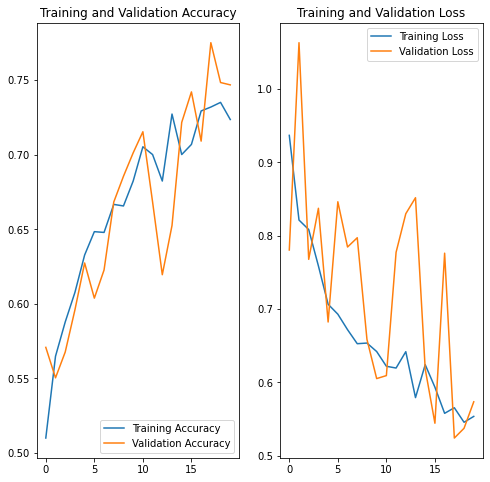

Training Accuracy:
0.7236154675483704
Testing Accuracy:
0.7468553185462952


(None, None)

In [ ]:
# From the tuned values above we have got decent performance of the model
# let us visualize the graphs of accuracy and validation accuracy 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#This code is used to plot the training and validation accuracy
epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
 
# returns accuracy of training
print("Training Accuracy:"), print(history.history['accuracy'][-1])
print("Testing Accuracy:"), print (history.history['val_accuracy'][-1])

## Testing Our model with the Unseen Data

Now, let us check the performance of the model on the new unseen data such that we know how well it is going to perform on the new data. Intially, we have saved some of our data into test directory, let us get that data and pass on the model

Found 450 images belonging to 3 classes.


C:\Users\shiva\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


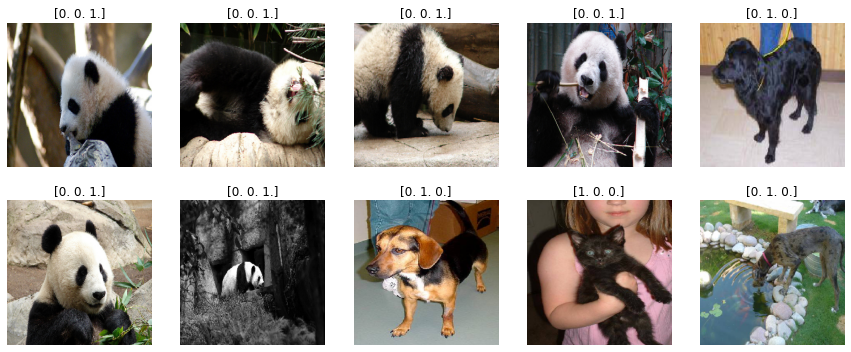

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images in the dataset will be rescaled by 1./255 such that we have the range of values from 0 to 1
test_datagen1 = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen1.flow_from_directory(
        # This is the target directory
        test_dir,
        # All images will be resized to 256x256
        # Here we chose 256x256 because this is the highest possible resolution of an image
        # Helps the model to understand the picture better
        target_size=(256, 256),
        batch_size=20,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# Let us visualize the data present in the test dataset

import random
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels from the generator
images, labels = next(test_generator)

# Shuffle the images and labels together
shuffled_indices = random.sample(range(len(images)), 10)
images = images[shuffled_indices]
labels = labels[shuffled_indices]

# Reverse normalization
images = images * 255

# Plot the images using Matplotlib
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()

for i, image in enumerate(images):
    axs[i].imshow(np.uint8(image))
    axs[i].axis("off")
    axs[i].set_title(labels[i])

plt.show()

## Performance Metrics 

1. Confusion Matrix for the Model

1/1 [==============================] - 0s 209ms/step


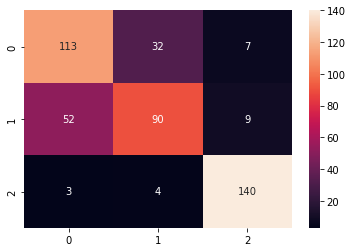

In [ ]:
# Evaluation of the model using various metrics
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def np_round(x):
    for i in range(0,len(x)):
        for j in range(0, len(x[i])):
            x[i][j] = np.round(x[i][j],0)
    return x

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

counter = 0
actual = list()
predict = list()
for X, y in test_generator:
    yhat = model.predict(X)
    predict = predict + list(np.argmax(np_round(yhat), axis =-1))
    actual = actual + list(np.argmax(y, axis = -1))
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    counter += 1
    if counter == len(test_generator):
        break

cfmatrix = confusion_matrix(actual, predict)
sns.heatmap(cfmatrix, annot = True , fmt='')
plt.show()

2. Precision, Accuracy and Recall of the model

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.772946834564209, Recall:0.7111111283302307, Accuracy:0.7622222304344177


## Saving our final model for future use

In [ ]:
model.save('catsanddogsandpanda-final.h5')

In this option, we have built our Convnet model from scratch and acheived an efficiency of around 80% ; whereas in the second option we can build a model using transfer learning, in transfer learning we will be having pre built models with all defined layers of network. In the second option we have acheive higher efficiency compared to the first one. 